<a href="https://colab.research.google.com/github/ItSick/AI-EDA/blob/main/Copy_of_Assignment_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Jupyter Notebook Assignment: Classification Models**

### **Dataset**: Use a classification dataset from Kaggle (e.g., [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic))


## **Assignment Instructions:**

### **1. Load and Explore the Data**

- Inspect shape, types, and missing values.
- Use `.info()`, `.describe()`, and visualizations to understand the data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
titanic = pd.read_csv('/content/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# convert to category

In [ ]:
object_columns = titanic.select_dtypes(include=['object']).columns
print(len(object_columns))
for col in object_columns:
    print(f"{col}: {len(titanic[col].unique())}")
    titanic[col] = titanic[col].astype('category')

5
Name: 891
Sex: 2
Ticket: 681
Cabin: 148
Embarked: 4


# Info after conversion

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
numeric_data = titanic.select_dtypes(include=[np.number])
print("\nNumeric Columns:")
print(numeric_data.columns)


Numeric Columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


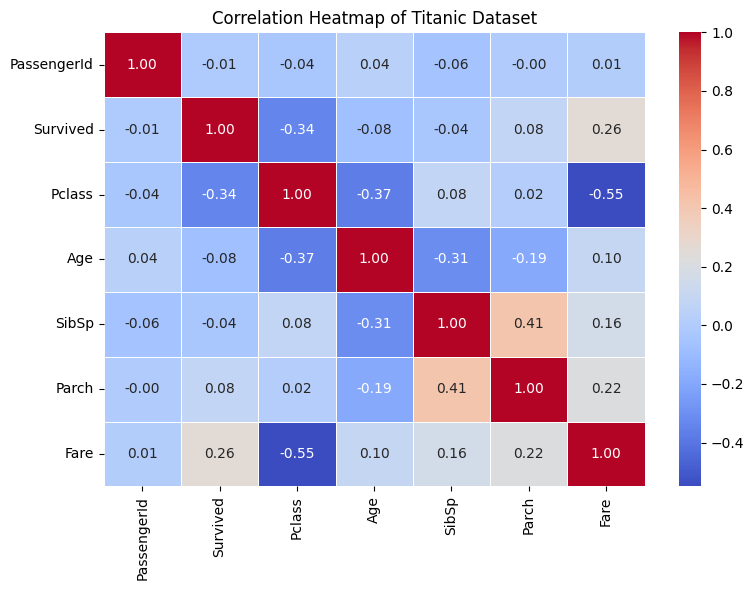

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.tight_layout()
plt.savefig('titanic_correlation_heatmap.png')
plt.show()

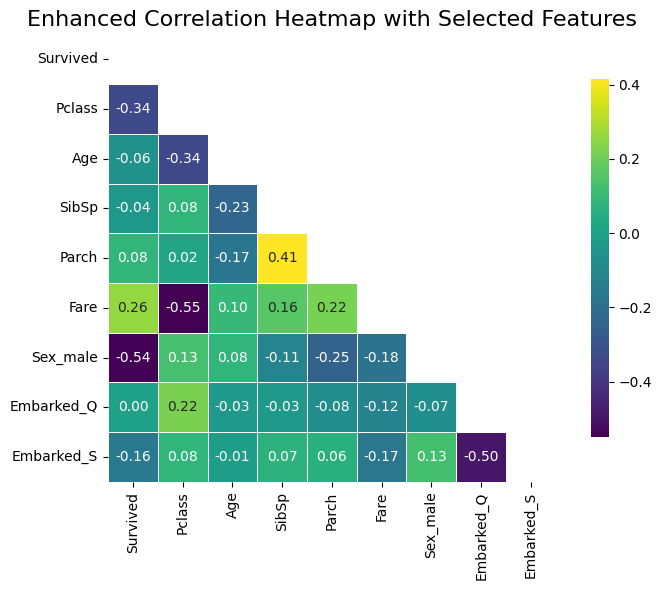


Features Correlation with Survival:
Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.155660
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


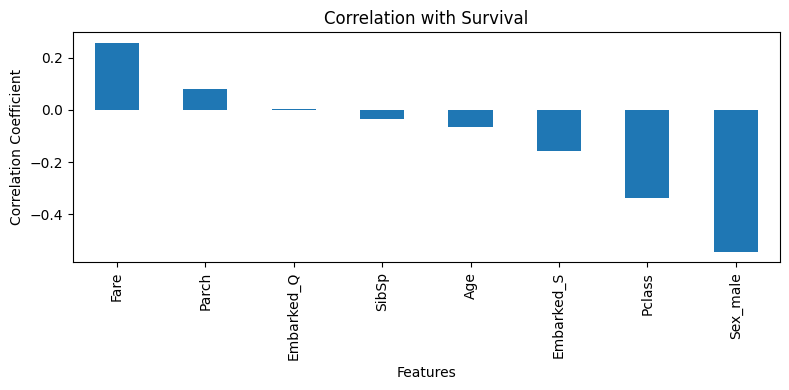

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

categorical_features = ['Sex', 'Embarked']
train_dummies = pd.get_dummies(titanic, columns=categorical_features, drop_first=True)

selected_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                     'Sex_male', 'Embarked_Q', 'Embarked_S']
selected_df = train_dummies[selected_features]
selected_corr = selected_df.corr()
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(selected_corr, dtype=bool))  # Create mask for upper triangle
sns.heatmap(selected_corr, mask=mask, annot=True, cmap='viridis', fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title('Enhanced Correlation Heatmap with Selected Features', fontsize=16)
plt.tight_layout()
plt.savefig('titanic_enhanced_correlation_heatmap.png')
plt.show()

survival_corr = selected_df.corr()['Survived'].sort_values(ascending=False)
print("\nFeatures Correlation with Survival:")
print(survival_corr)

plt.figure(figsize=(8, 4))
survival_corr.drop('Survived').plot(kind='bar')
plt.title('Correlation with Survival')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('correlation_with_survival.png')
plt.show()



### **2. Handle Missing Data**

- Apply appropriate strategies:
  - Numerical: mean/median imputation.
  - Categorical: mode imputation or flagging.


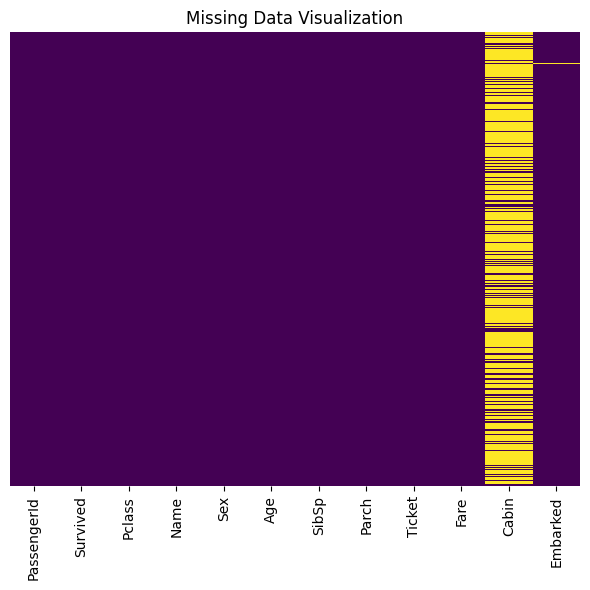

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization')
plt.tight_layout()
plt.show()

In [ ]:
titanic_processed = titanic.copy()
age_median = titanic_processed['Age'].median()
titanic_processed['Age'] = titanic_processed['Age'].fillna(age_median)
print(f"\nImputed Age nulls with median value: {age_median:.2f}")

print("__________________________________________________")

fare_median = titanic_processed['Fare'].median()
titanic_processed['Fare'] = titanic_processed['Fare'].fillna(fare_median)
print(f"Imputed Fare nulls with median value: {fare_median:.2f}")

print("__________________________________________________")

embarked_mode = titanic_processed['Embarked'].mode()[0]
titanic_processed['Embarked'] = titanic_processed['Embarked'].fillna(embarked_mode)
print(f"Imputed Embarked nulls with mode value: '{embarked_mode}'")

print("__________________________________________________")


print("\nAfter imputation - missing values:")
print(titanic_processed.isnull().sum())


Imputed Age nulls with median value: 28.00
__________________________________________________
Imputed Fare nulls with median value: 14.45
__________________________________________________
Imputed Embarked nulls with mode value: 'S'
__________________________________________________

After imputation - missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
titanic_processed['HasCabin'] = titanic_processed['Cabin'].notna().astype(int)
titanic_processed['Deck'] = titanic_processed['Cabin'].str[0]
titanic_processed['Deck'] = titanic_processed['Deck'].fillna('U')
titanic_processed['Cabin'] = titanic_processed['Cabin'].cat.add_categories('Unknown')
titanic_processed['Cabin'] = titanic_processed['Cabin'].fillna('Unknown')
print("\nAfter imputation - missing values:")
print(titanic_processed.isnull().sum())


After imputation - missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
HasCabin       0
Deck           0
dtype: int64


In [ ]:
titanic_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,U


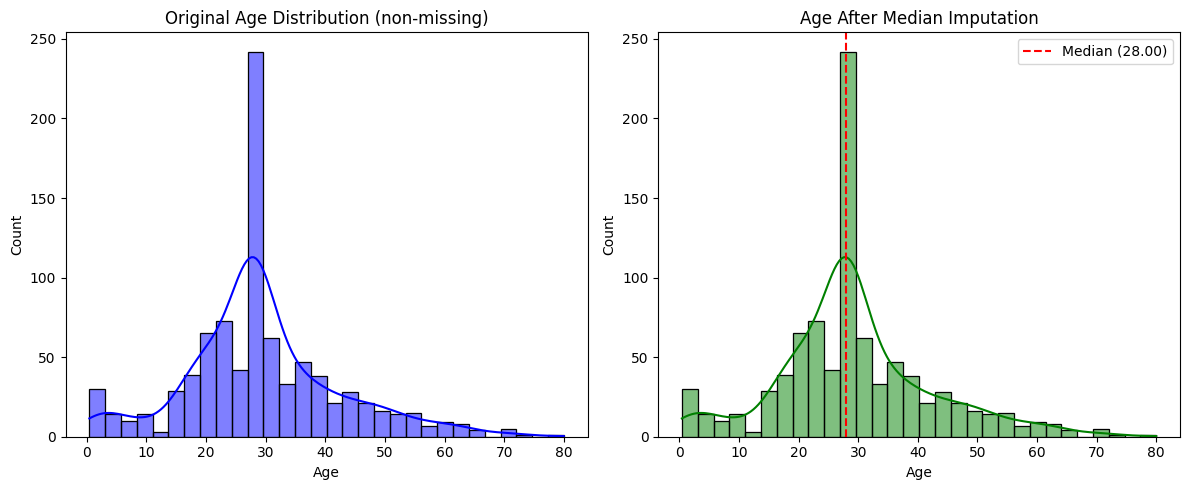

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'].dropna(), kde=True, color='blue')
plt.title('Original Age Distribution (non-missing)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(titanic_processed['Age'], kde=True, color='green')
plt.axvline(x=age_median, color='red', linestyle='--',
           label=f'Median ({age_median:.2f})')
plt.title('Age After Median Imputation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

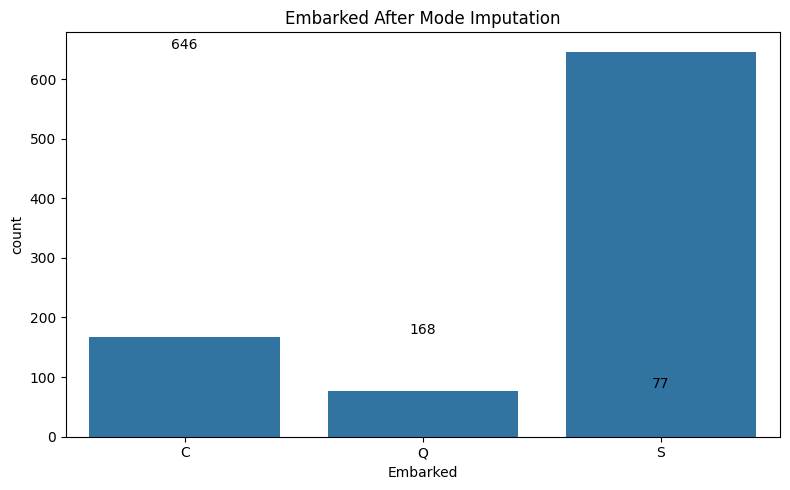

In [ ]:
plt.figure(figsize=(8, 5))
embark_counts = titanic_processed['Embarked'].value_counts()
plt.subplot(1, 1, 1)
sns.countplot(x='Embarked', data=titanic_processed)
plt.title('Embarked After Mode Imputation')
for i, count in enumerate(embark_counts):
    plt.text(i, count + 5, str(count), ha='center')
plt.tight_layout()
plt.show()

*italicized text*
### **3. Encode Categorical Variables**

- Use one-hot encoding or label encoding as appropriate.


# convert column 'Sex' to 1(male) and 0(female)

In [ ]:
titanic_processed['Sex'] = LabelEncoder().fit_transform(titanic_processed['Sex'])

# convert 'Embraked' column to 'Embraked_Q' and 'Embraked_S' to boolean value columns

- dropping 'Embraked_C' to avoid multicollinearity

In [ ]:
titanic_processed = pd.get_dummies(titanic_processed, columns=['Embarked'], drop_first=True)

In [ ]:
titanic_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,HasCabin,Deck,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,0,U,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,U,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,C,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,0,U,False,True


In [ ]:
unique_decks = sorted(titanic_processed['Deck'].dropna().unique())
print(unique_decks)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']


In [ ]:
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'U': 9}
titanic_processed['Deck_Number'] = titanic_processed['Deck'].map(deck_mapping)
print(titanic_processed[['Deck', 'Deck_Number']].drop_duplicates())

    Deck  Deck_Number
0      U            9
1      C            3
6      E            5
10     G            7
21     D            4
23     A            1
31     B            2
66     F            6
339    T            8



### **4. Logistic Regression Model**

- Train a logistic regression classifier.
- Evaluate using **accuracy, precision, recall, F1-score, ROC AUC**.
- Check coefficient significance and interpret.


In [ ]:
titanic_processed.drop(['Name', 'Ticket', 'Cabin', 'Deck'], axis=1, inplace=True)
titanic_processed.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_Q,Embarked_S,Deck_Number
0,1,0,3,1,22.0,1,0,7.2500,0,False,True,9
1,2,1,1,0,38.0,1,0,71.2833,1,False,False,3
2,3,1,3,0,26.0,0,0,7.9250,0,False,True,9
3,4,1,1,0,35.0,1,0,53.1000,1,False,True,3
4,5,0,3,1,35.0,0,0,8.0500,0,False,True,9


In [ ]:
X = titanic_processed.drop(['Survived'], axis=1)
y = titanic_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.8101
Precision: 0.7869
Recall: 0.6957
F1-score: 0.7385
ROC AUC: 0.8353


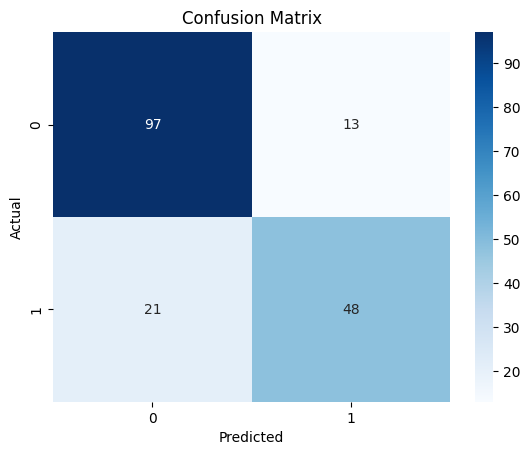


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

- 0 = did not surevive
- 1 = survived

#Check Coefficient Significance & Interpretation

<ipython-input-67-b849982e6dfe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="coolwarm")


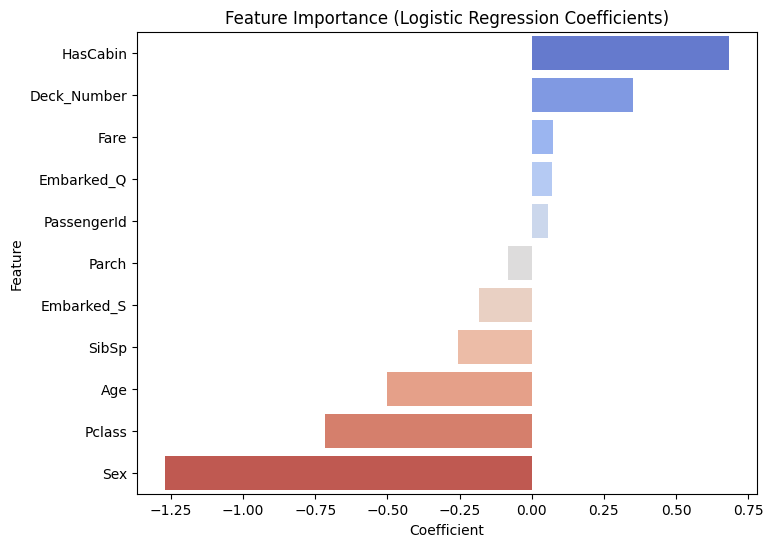

In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

#Interpretation:
- Positive coefficients indicate features that increase probability to survive.

- Sex Feature have a strong negative coefficient, meaning women had a higher chance of survival.

להמשיך מכאן
ולעשות חזרה על התמסקנות של  
scalar + linearRegression



### **5. Try Probit (Optional)**

- Use `statsmodels`' probit model.
- Compare model fit and AIC to logistic regression.


In [ ]:

X = titanic_processed[['Pclass', 'Age', 'Fare', 'HasCabin']]
y = titanic_processed['Survived']

X = X.dropna()
y = y.loc[X.index]  # Ensure matching indices

X = sm.add_constant(X)

probit_model = sm.Probit(y, X).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.581307
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                         Probit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                  0.1271
Time:                        13:00:02   Log-Likelihood:                -517.94
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.396e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2016      0.286      4.203      0.000       0.641       1.762
Pclass        -0.4482      0.

In [ ]:
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


print(f"Probit AIC: {probit_model.aic}")
print(f"Logistic AIC: {logit_model.aic}")

print(f"Probit Log-Likelihood: {probit_model.llf}")
print(f"Logistic Log-Likelihood: {logit_model.llf}")

Optimization terminated successfully.
         Current function value: 0.581050
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                  0.1274
Time:                        13:02:47   Log-Likelihood:                -517.72
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.113e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9866      0.474      4.194      0.000       1.058       2.915
Pclass        -0.7318      0.

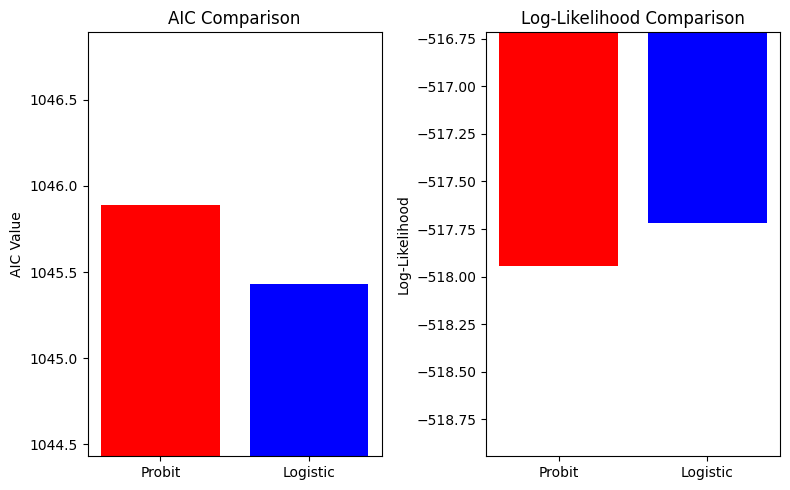

In [ ]:
models = ["Probit", "Logistic"]
aic_values = [probit_model.aic, logit_model.aic]
llf_values = [probit_model.llf, logit_model.llf]

fig, ax = plt.subplots(1, 2, figsize=(8, 5))


ax[0].bar(models, aic_values, color=['red', 'blue'])
ax[0].set_title("AIC Comparison")
ax[0].set_ylabel("AIC Value")
ax[0].set_ylim(min(aic_values) - 1, max(aic_values) + 1)


ax[1].bar(models, llf_values, color=['red', 'blue'])
ax[1].set_title("Log-Likelihood Comparison")
ax[1].set_ylabel("Log-Likelihood")
ax[1].set_ylim(min(llf_values) - 1, max(llf_values) + 1)

plt.tight_layout()
plt.show()

#Interpretation

1. Logistic Regression Has a Slightly Lower AIC (1045.43 vs. 1045.89)

- Lower AIC is better, meaning the logistic model provides a marginally better
  balance between model fit and complexity.

2. Logistic Regression Has a Higher Log-Likelihood (-517.72 vs. -517.94)

- A higher (closer to zero) log-likelihood means the logistic model fits the
  data slightly better than the probit model.

להמשיך מכאן
כרגע יש לי בעיה עם מספר הפיצ'רים בשביל לממש עץ החלטה
סעיף 6 למטה


### **6. Train Decision Tree Classifier**

- Use `DecisionTreeClassifier` from sklearn.
- Visualize the tree.
- Evaluate with classification metrics.


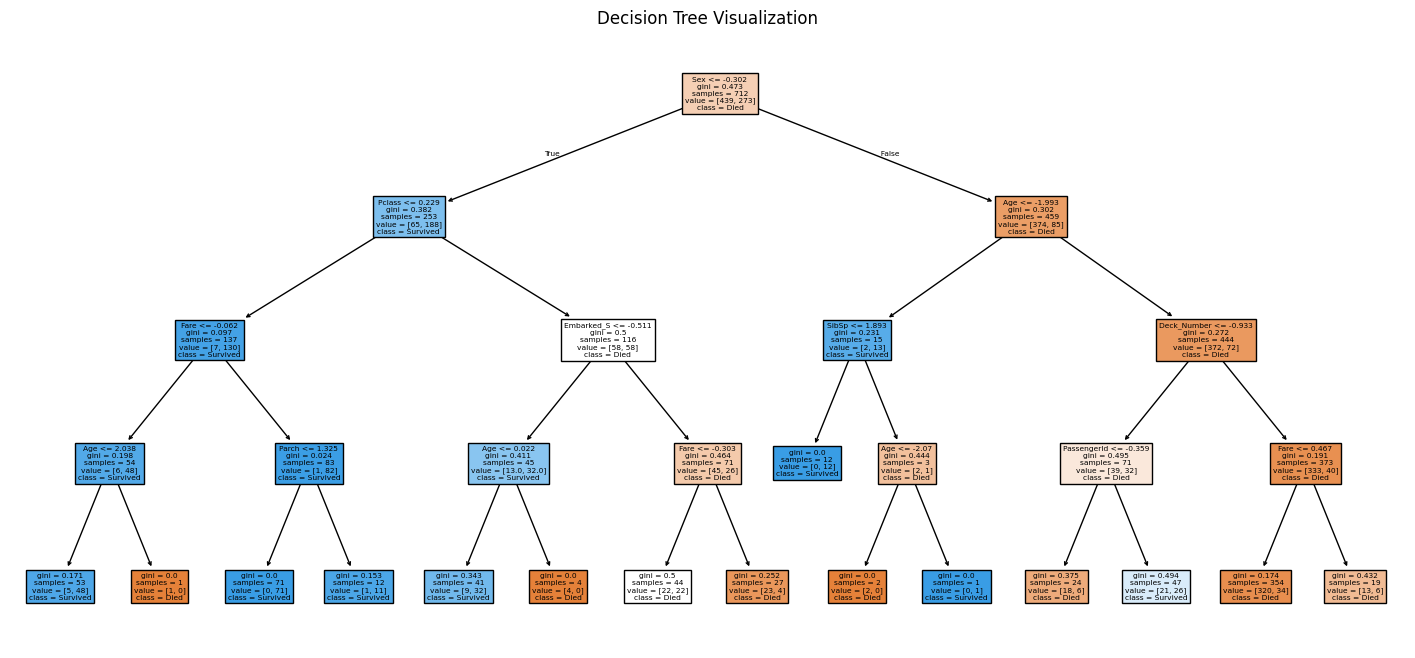

Accuracy: 0.7765
Precision: 0.7458
Recall: 0.6377
F1-score: 0.6875


In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
plt.figure(figsize=(18,8))
plot_tree(clf, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[95 15]
 [25 44]]


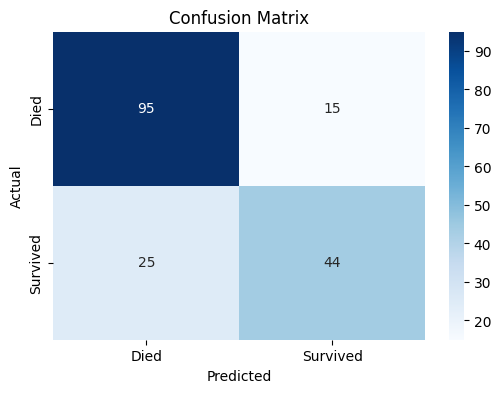

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### **7. Train Random Forest Classifier**

- Use `RandomForestClassifier`.
- Plot feature importance.
- Evaluate and compare to logistic regression and single tree.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Random Forest Accuracy: 0.7989


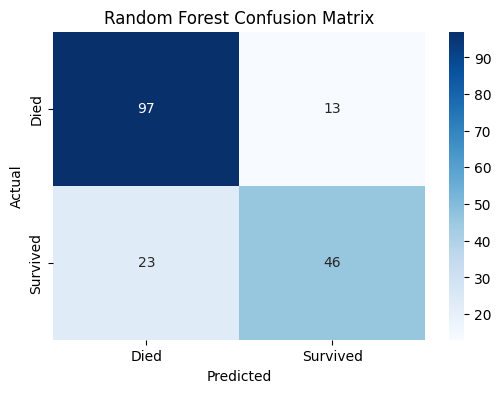

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

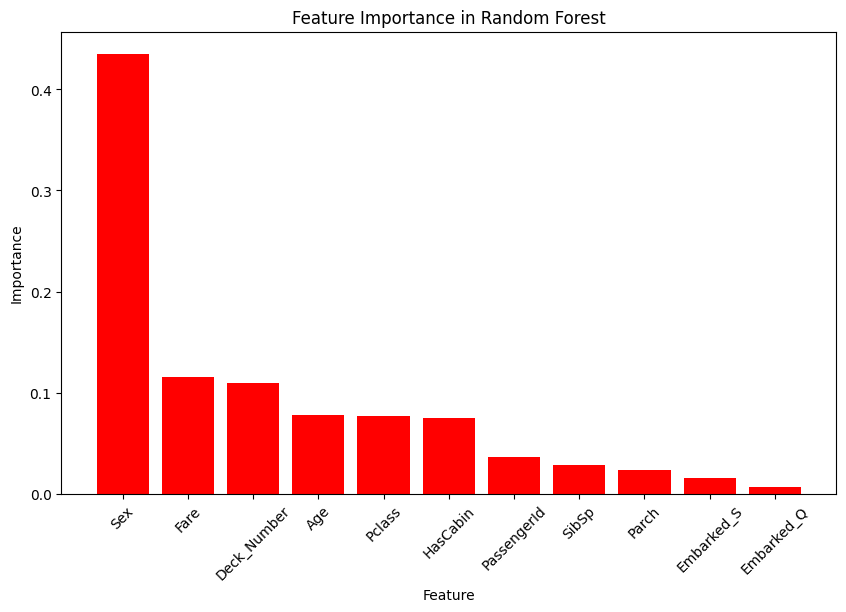

In [ ]:
importances = random_forest.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center", color='red')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


### **8. Analyze Residuals and Misclassifications**

- Investigate incorrectly classified examples.
- Consider potential reasons: outliers, noise, feature limitations.


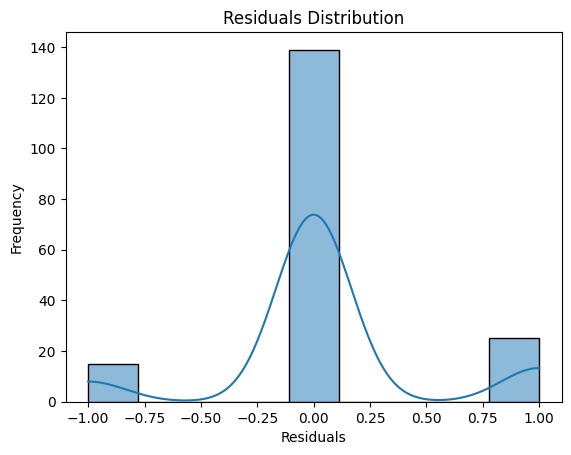

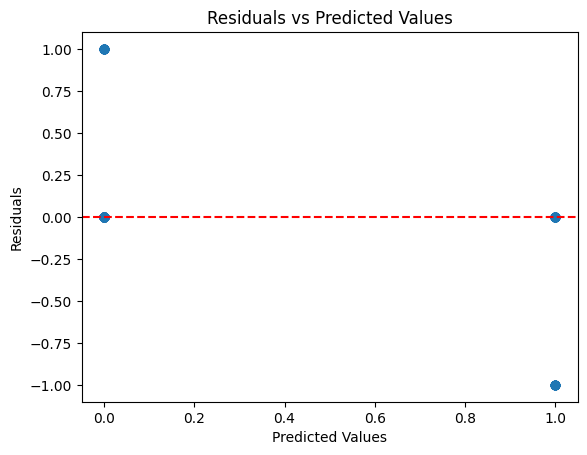

In [ ]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

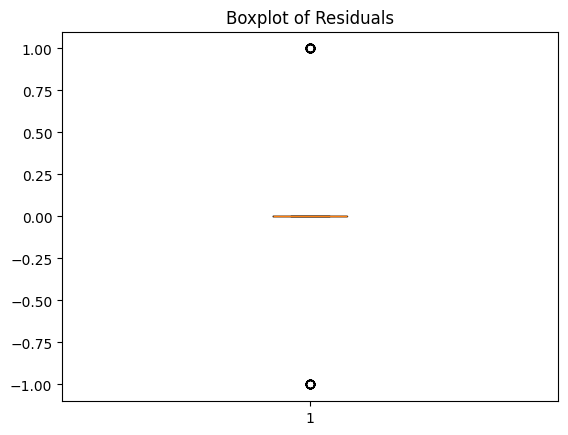

In [ ]:
plt.boxplot(residuals)
plt.title("Boxplot of Residuals")
plt.show()



### **9. Compare Models**

- Table of performance metrics across all models.
- Highlight which performs best and why.

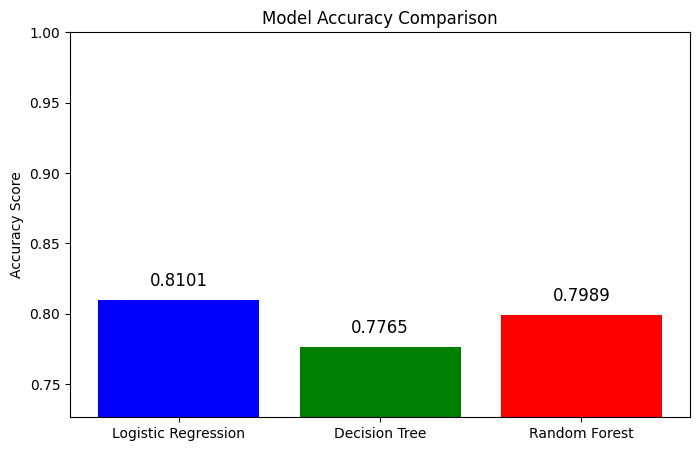

In [ ]:
accuracy_logit = accuracy_score(y_test, log_reg.predict(X_test))
accuracy_tree = accuracy_score(y_test, clf.predict(X_test))
accuracy_rf = accuracy_score(y_test, y_pred_rf)

models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracies = [accuracy_logit, accuracy_tree, accuracy_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(min(accuracies) - 0.05, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

plt.show()



### **10. Reflection**

- What are the strengths and limitations of each classifier?
- When would you prefer a simple logistic regression over a complex random forest?

---

**End of Lecture & Assignment**

